# Packages to be Imported

In [59]:
import re
import string
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import xgboost as xgb
import seaborn as sns

# Loading and Reading Data 

In [60]:
df = pd.read_csv("spam.csv",encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Shape of Raw data

In [61]:
df.shape

(5572, 5)

## Information about Raw data

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Checking the data for null values

In [63]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## Removing insignificant fields and Renaming field names

In [64]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.columns = ['target', 'message']
df['message_len'] = df['message'].apply(lambda x: len(x.split(' ')))
df.head()

,target,message,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [ ]:
## Unique values of each field and their count

In [9]:
df.target.value_counts(dropna=False)

ham     4825
spam     747
Name: target, dtype: int64

## Make text lowercase, remove text in square brackets, remove links, remove punctuation and remove words containing numbers.

In [10]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df['message_clean'] = df['message'].apply(clean_text)
df.head()

,target,message,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,11,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah i dont think he goes to usf he lives aroun...


## Removing Stopwords

In [11]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c', 'ok']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df['message_clean'] = df['message_clean'].apply(remove_stopwords)
df.head()

,target,message,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,6,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry wkly comp win fa cup final tkts m...
3,ham,U dun say so early hor... U c already then say...,11,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think goes usf lives around though


## Lemmatizing Words

In [12]:
lemmatizer = WordNetLemmatizer()
def lemma_text(text):
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split(' '))
    return text
df['message_clean'] = df['message_clean'].apply(lemma_text)
df.head()

,target,message,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,6,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry wkly comp win fa cup final tkts m...
3,ham,U dun say so early hor... U c already then say...,11,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think go usf life around though


## Encoding the Target Field

In [14]:
le = LabelEncoder()
le.fit(df['target'])

df['target_encoded'] = le.transform(df['target'])
df.head()

,target,message,message_len,message_clean,target_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,6,lar joking wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry wkly comp win fa cup final tkts m...,1
3,ham,U dun say so early hor... U c already then say...,11,dun say early hor already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think go usf life around though,0


In [15]:
x = df['message_clean']
y = df['target_encoded']
print(len(x), len(y))

5572 5572


## Splitting data into train and test data for model fitting

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print("No.of.x_train: ", len(x_train),", ", "No.of.y_train: ", len(y_train))
print("No.of.x_test: ", len(x_test),", ","No.of.y_test: ", len(y_test))

No.of.x_train:  4179 ,  No.of.y_train:  4179
No.of.x_test:  1393 ,  No.of.y_test:  1393


## Taking count of each word and calculating probability using Count vectorizer and TF-IDF.

In [17]:
vect = CountVectorizer()
vect.fit(x_train)
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

## Naive Bayes Theorem 

0.9777458722182341
0.9730858691012362


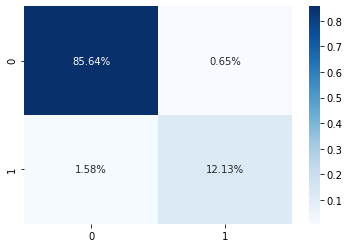

In [51]:
nb = MultinomialNB()
nb.fit(x_train_dtm, y_train)
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.roc_auc_score(y_test, y_pred_prob))
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

## Creating pipes to avoid repeating preprocessing for different models

In [18]:
pipe_nb = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])
pipe_xg = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
        colsample_bytree=0.8,
        subsample=0.7,
        min_child_weight=5,
    ))
])

In [ ]:
## Naive Bayes modeling usinh Pipe

0.9605168700646087


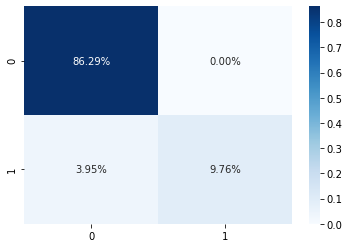

In [50]:
pipe_nb.fit(x_train, y_train)
y_pred_class = pipe_nb.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred_class))
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

## xgboost modeling usinh Pipe

Train: 0.966499162479062
Test: 0.9526202440775305


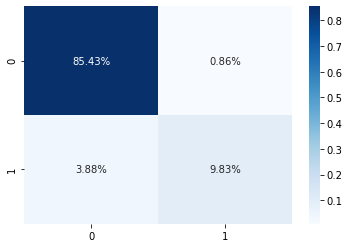

In [48]:
pipe_xg.fit(x_train, y_train)

y_pred_class = pipe_xg.predict(x_test)
y_pred_train = pipe_xg.predict(x_train)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')